In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

#=========Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report

#===========Importing Classifier=========
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn import tree

### Loading and Transforming the data to Numerical Values

In [2]:
#========Loading the dataset======
loan = pd.read_csv('data/loan.csv')


#==========Visualising the Dataset======
loan.head()

#=======Checking the presence of Null Values=========
#==== We use built in Function isnull() and sum()
loan.isnull().sum()

#========filling null values in Column with Numerical Values============
#===========Loading the Required libray
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
loan_n = loan.iloc[:, 8:11]
dependat =loan['Dependents']
dependat = dependat.replace('3+', 3)
loan_n1 = loan.iloc[:, 3:4]
imputer.fit(loan_n)
loan_n = imputer.transform(loan_n)
loan_d = pd.DataFrame(loan_n)
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
loan['LoanAmount'],loan['Loan_Amount_Term'], loan['Credit_History'] = loan_d[0], loan_d[1], loan_d[2]
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
employ = loan['Self_Employed']
P_area = loan['Property_Area']
gender = loan["Gender"]
status = loan["Married"]
education = loan["Education"]
loan_status = loan['Loan_Status']


status = status.fillna("Yes")
gender = gender.fillna("Male")
P_area= P_area.fillna("Rural")
employ= employ.fillna("Yes")
dependat = dependat.fillna(1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#========Initializing String to be Encoded==========

input_class = ["Male", "Female"]
input_class1 = ["Yes", "No"]
input_class2 = ["Rural", "Urban", "Semiurban"]
input_class3 = ["Graduate", "Not Graduate"]
input_class4 = ["Y", "N"]

label_encoder.fit(input_class)


gender = gender.iloc[:].values
gender = list(gender)
gender = label_encoder.transform(gender)

label_encoder.fit(input_class1)

status = status.iloc[:].values
employ = employ.iloc[:].values
employ = list(employ)
status = list(status)
status = label_encoder.transform(status)
employ = label_encoder.transform(employ)


label_encoder.fit(input_class2)

P_area = P_area.iloc[:].values
P_area = list(P_area)
P_area = label_encoder.transform(P_area)

label_encoder.fit(input_class3)

education = education.iloc[:].values
education = list(education)
education = label_encoder.transform(education)

label_encoder.fit(input_class4)

loan_status = loan_status.iloc[:].values
loan_status =list(loan_status)
loan_status = label_encoder.transform(loan_status)

### New CSV generated to save the data

In [5]:
loan['Education'],loan['Self_Employed'],loan['Property_Area'],loan["Gender"],loan["Married"], loan['Loan_Status'], loan['Dependents'] =education, employ, P_area, gender, status, loan_status, dependat
loan.head()
loan.to_csv("Loan Processed data.csv")

### CSV for the Expected results for the newmerical values

In [6]:
data = loan.iloc[:, 1:-1]
target = loan.iloc[:, -1:]

In [7]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0


In [8]:
target.head(2)

,Loan_Status
0,1
1,0


In [9]:
data.to_csv("Data.csv")
target.to_csv("Target.csv")

# Model Comparision 


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 1/5, random_state=10)

model_a = RandomForestClassifier()
model_a.fit(x_train, y_train)
pred = model_a.predict(x_test)
forest = accuracy_score(y_test, pred)



from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
k = accuracy_score(y_test, pred)


from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
MB= accuracy_score(y_test, pred)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
GB=accuracy_score(y_test, pred)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
LR=accuracy_score(y_test, pred)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
DTC=  accuracy_score(y_test, pred)

print ("""The result were as Follows\nRandom Forest Classifer {}\n\nK Nearest Neighbors {}\n\nMultinomial NB {}\n\nGaussian NB {}\n\nLogistic Regression {}\n\nDecision Tree Classifier {}
""".format(forest,k, MB, GB, LR, DTC))

The result were as Follows
Random Forest Classifer 0.7804878048780488

K Nearest Neighbors 0.6097560975609756

Multinomial NB 0.5365853658536586

Gaussian NB 0.7804878048780488

Logistic Regression 0.7967479674796748

Decision Tree Classifier 0.7154471544715447



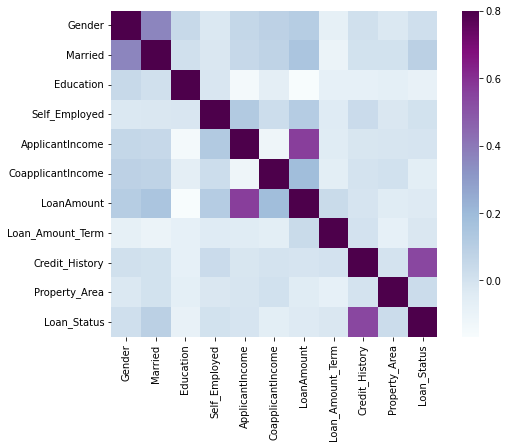

In [11]:
matrix =loan.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Missing Value and Outlier Treatment

### Missing Value Imputation

In [12]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train_original=train.copy() 
test_original=test.copy()

In [13]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [15]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### Outlier Treatment

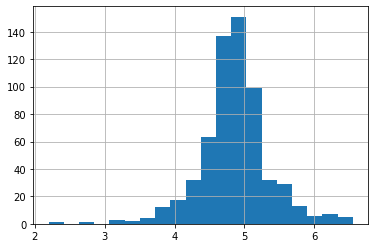

In [18]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])


## Evaluation Metrics for Classification
### Model Building: Part 1

* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of the Logit function. The logit function is simply a log of odds in favor of the event.
* This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [19]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [20]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [21]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [22]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [23]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
pred_cv = model.predict(x_cv)

* So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

In [25]:
pred_test = model.predict(test)